In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [5]:
# Load datasets
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [6]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
display(train.head())

Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
print(train.info())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values in train:\n", missing)


Missing values in train:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


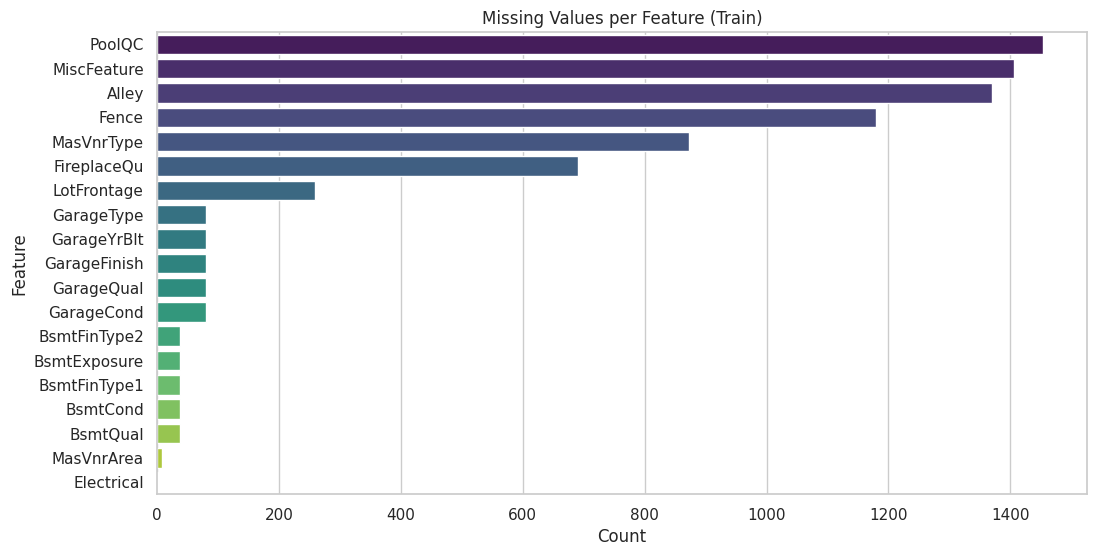

In [9]:
sns.barplot(x=missing.values, y=missing.index, palette='viridis')
plt.title("Missing Values per Feature (Train)")
plt.xlabel("Count")
plt.ylabel("Feature")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


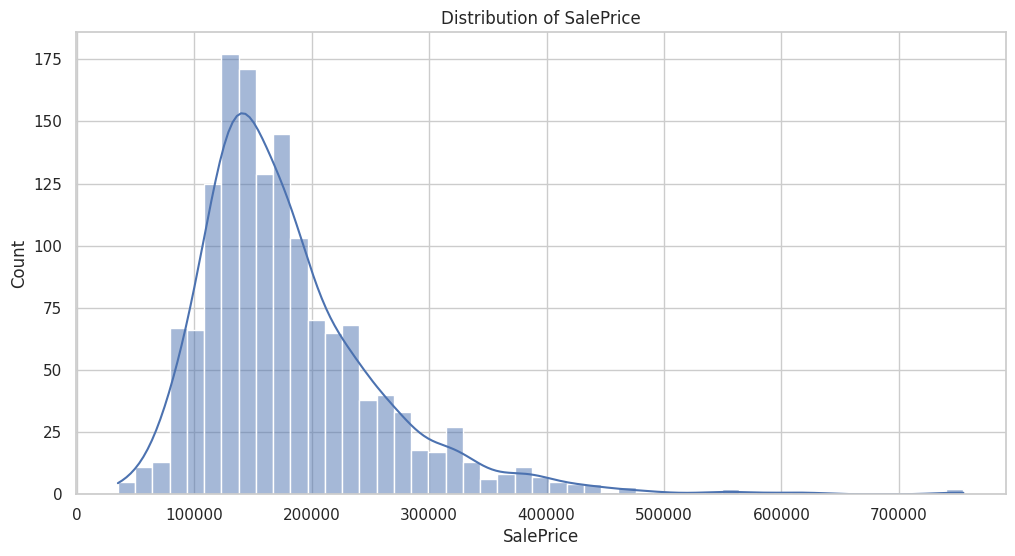

In [10]:
# Target variable analysis
sns.histplot(train['SalePrice'], kde=True, color='b')
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.show()


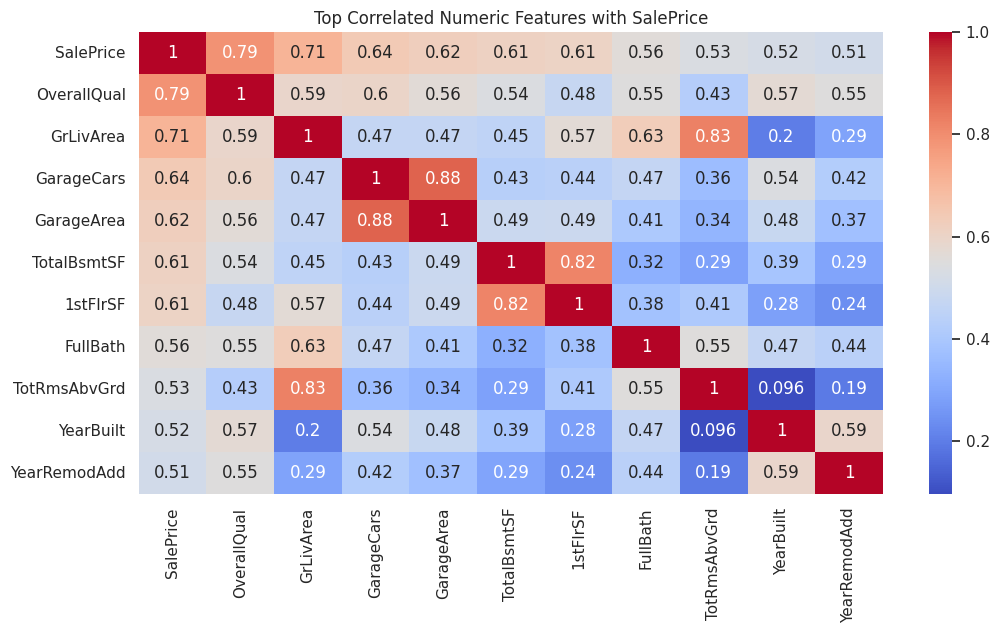

In [11]:
# Get only numeric columns
numeric_cols = train.select_dtypes(include=[np.number]).columns

# Compute correlation only on numeric columns
corr = train[numeric_cols].corr()

# Top 10 features most correlated with SalePrice
top_corr_features = corr['SalePrice'].abs().sort_values(ascending=False).head(11).index

# Plot heatmap for these features
sns.heatmap(train[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title("Top Correlated Numeric Features with SalePrice")
plt.show()


In [12]:
# Example: Apply one-hot encoding to all categorical columns
train_encoded = pd.get_dummies(train, drop_first=True)
test_encoded = pd.get_dummies(test, drop_first=True)

# Align train and test columns
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)


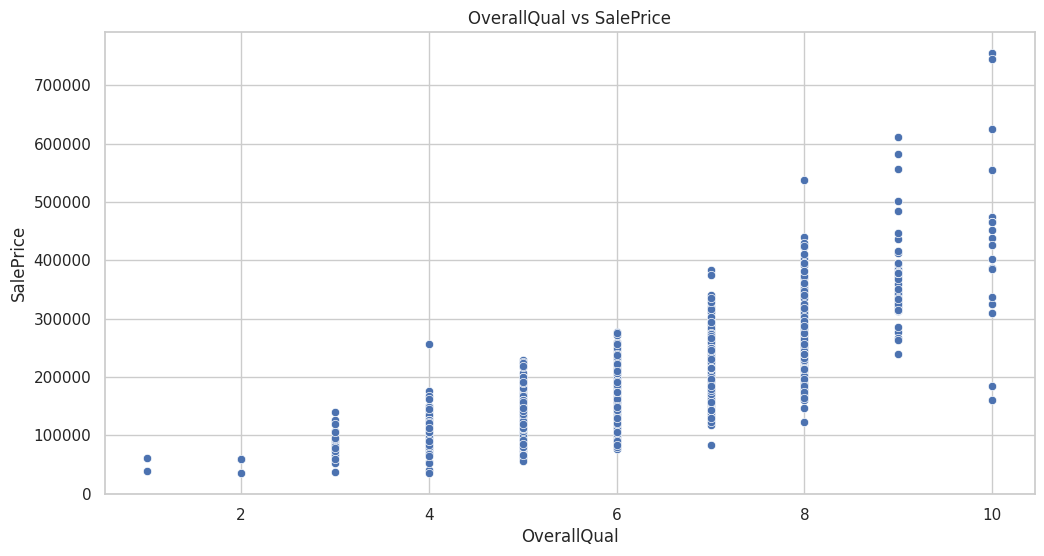

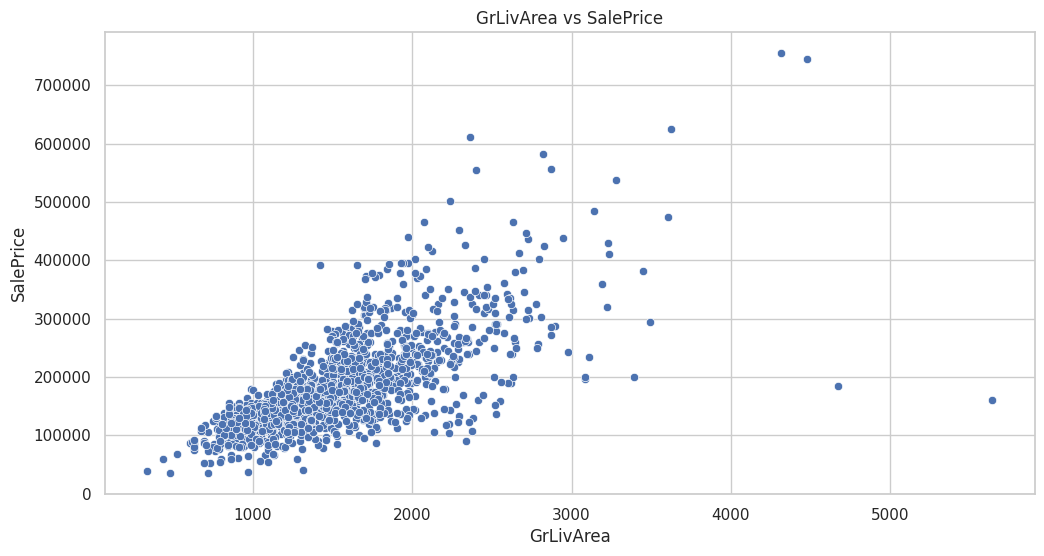

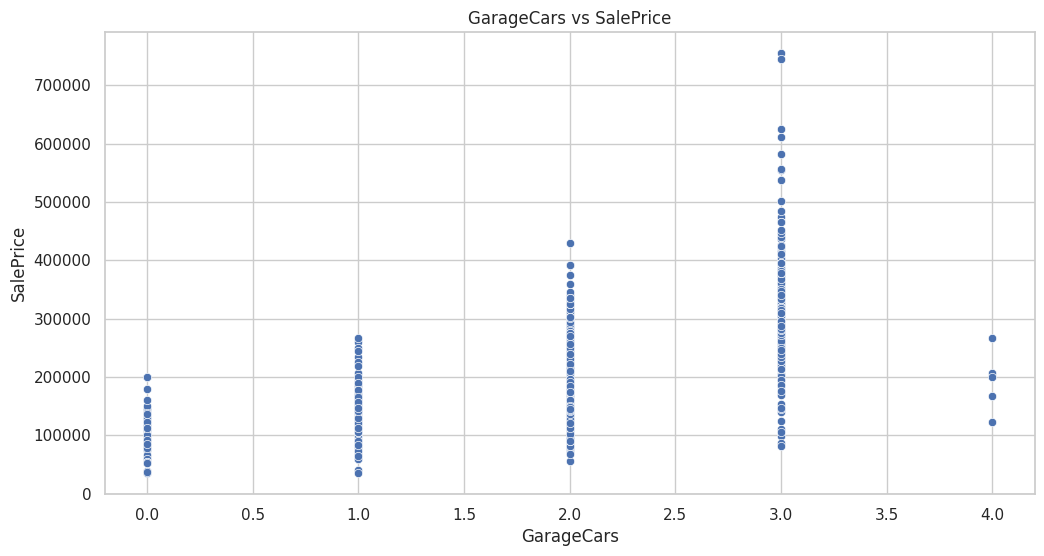

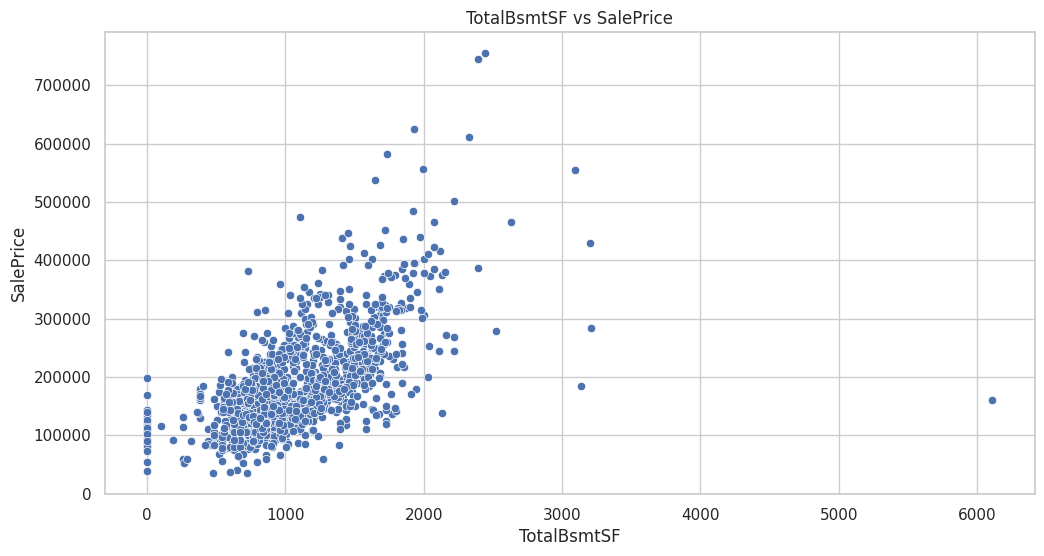

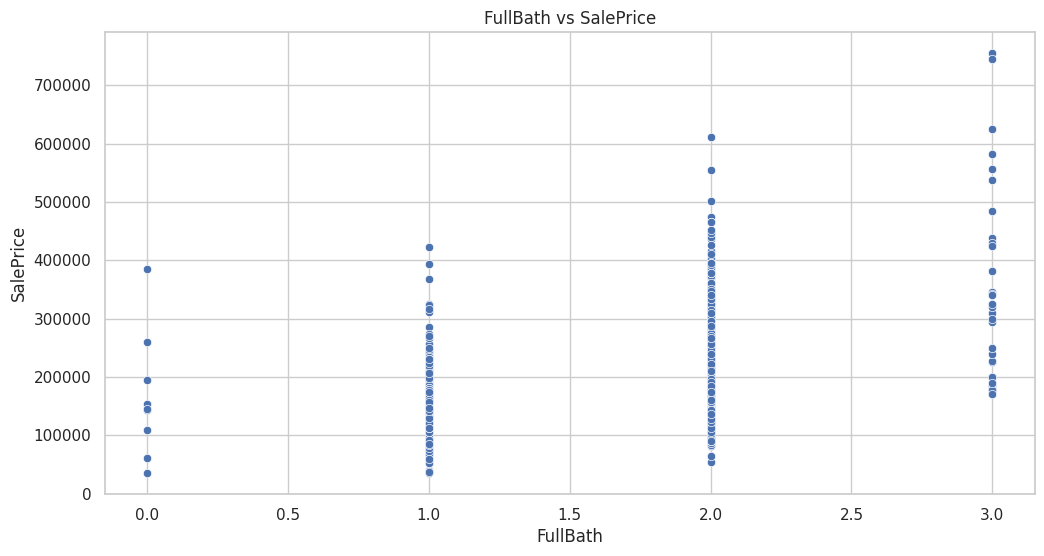

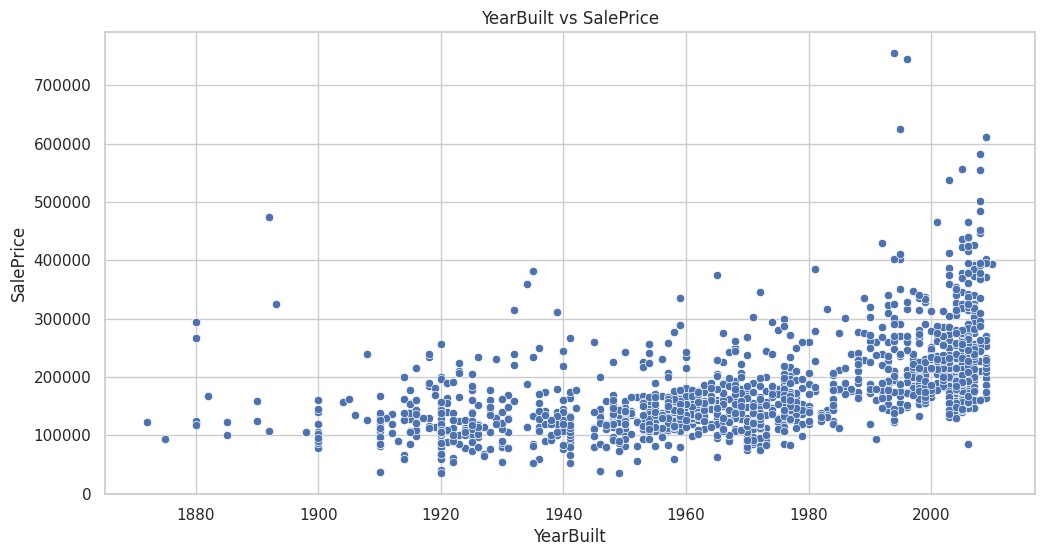

In [13]:
# Visualize relationship with SalePrice for top features
top_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
for feature in top_features:
    if train[feature].dtype == 'object':
        sns.boxplot(x=feature, y='SalePrice', data=train)
    else:
        sns.scatterplot(x=feature, y='SalePrice', data=train)
    plt.title(f"{feature} vs SalePrice")
    plt.show()

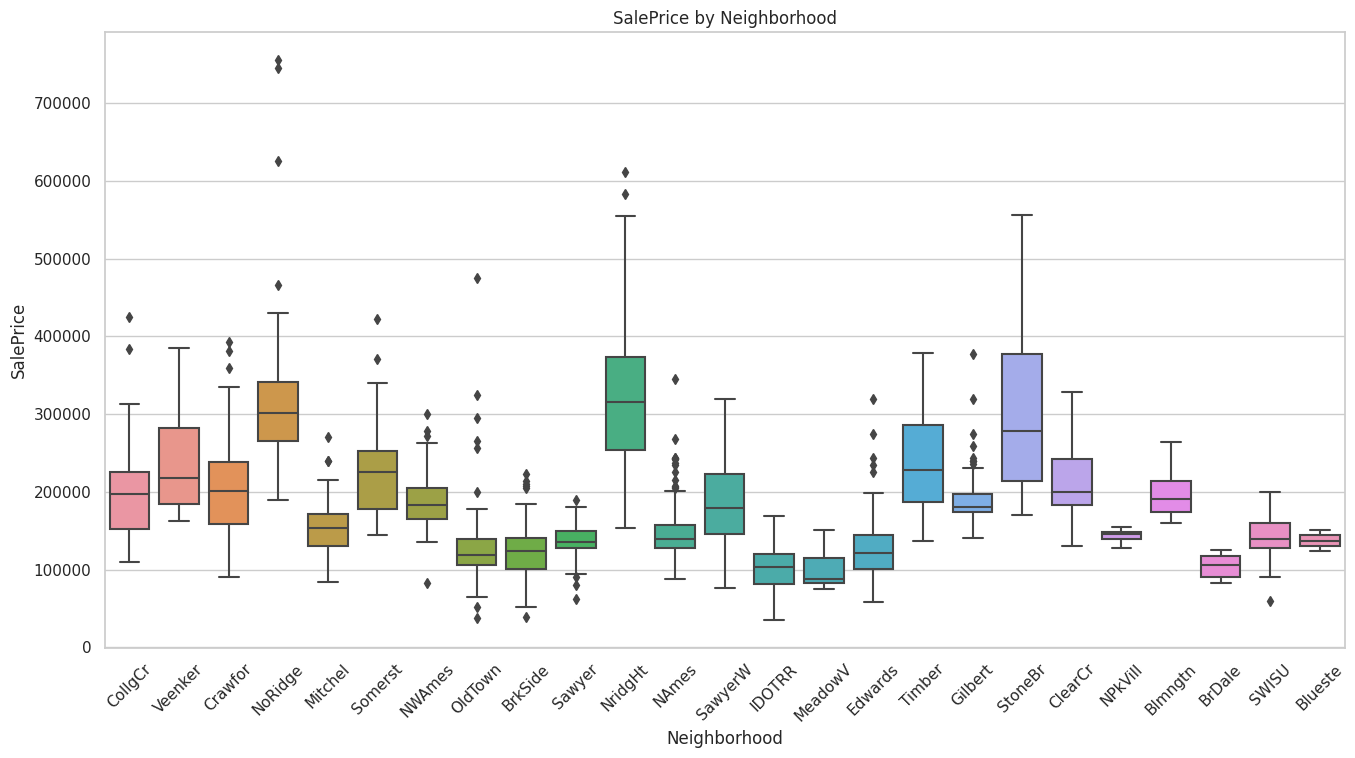

In [14]:
# Categorical feature distribution (example: Neighborhood)
plt.figure(figsize=(16, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)
plt.xticks(rotation=45)
plt.title("SalePrice by Neighborhood")
plt.show()



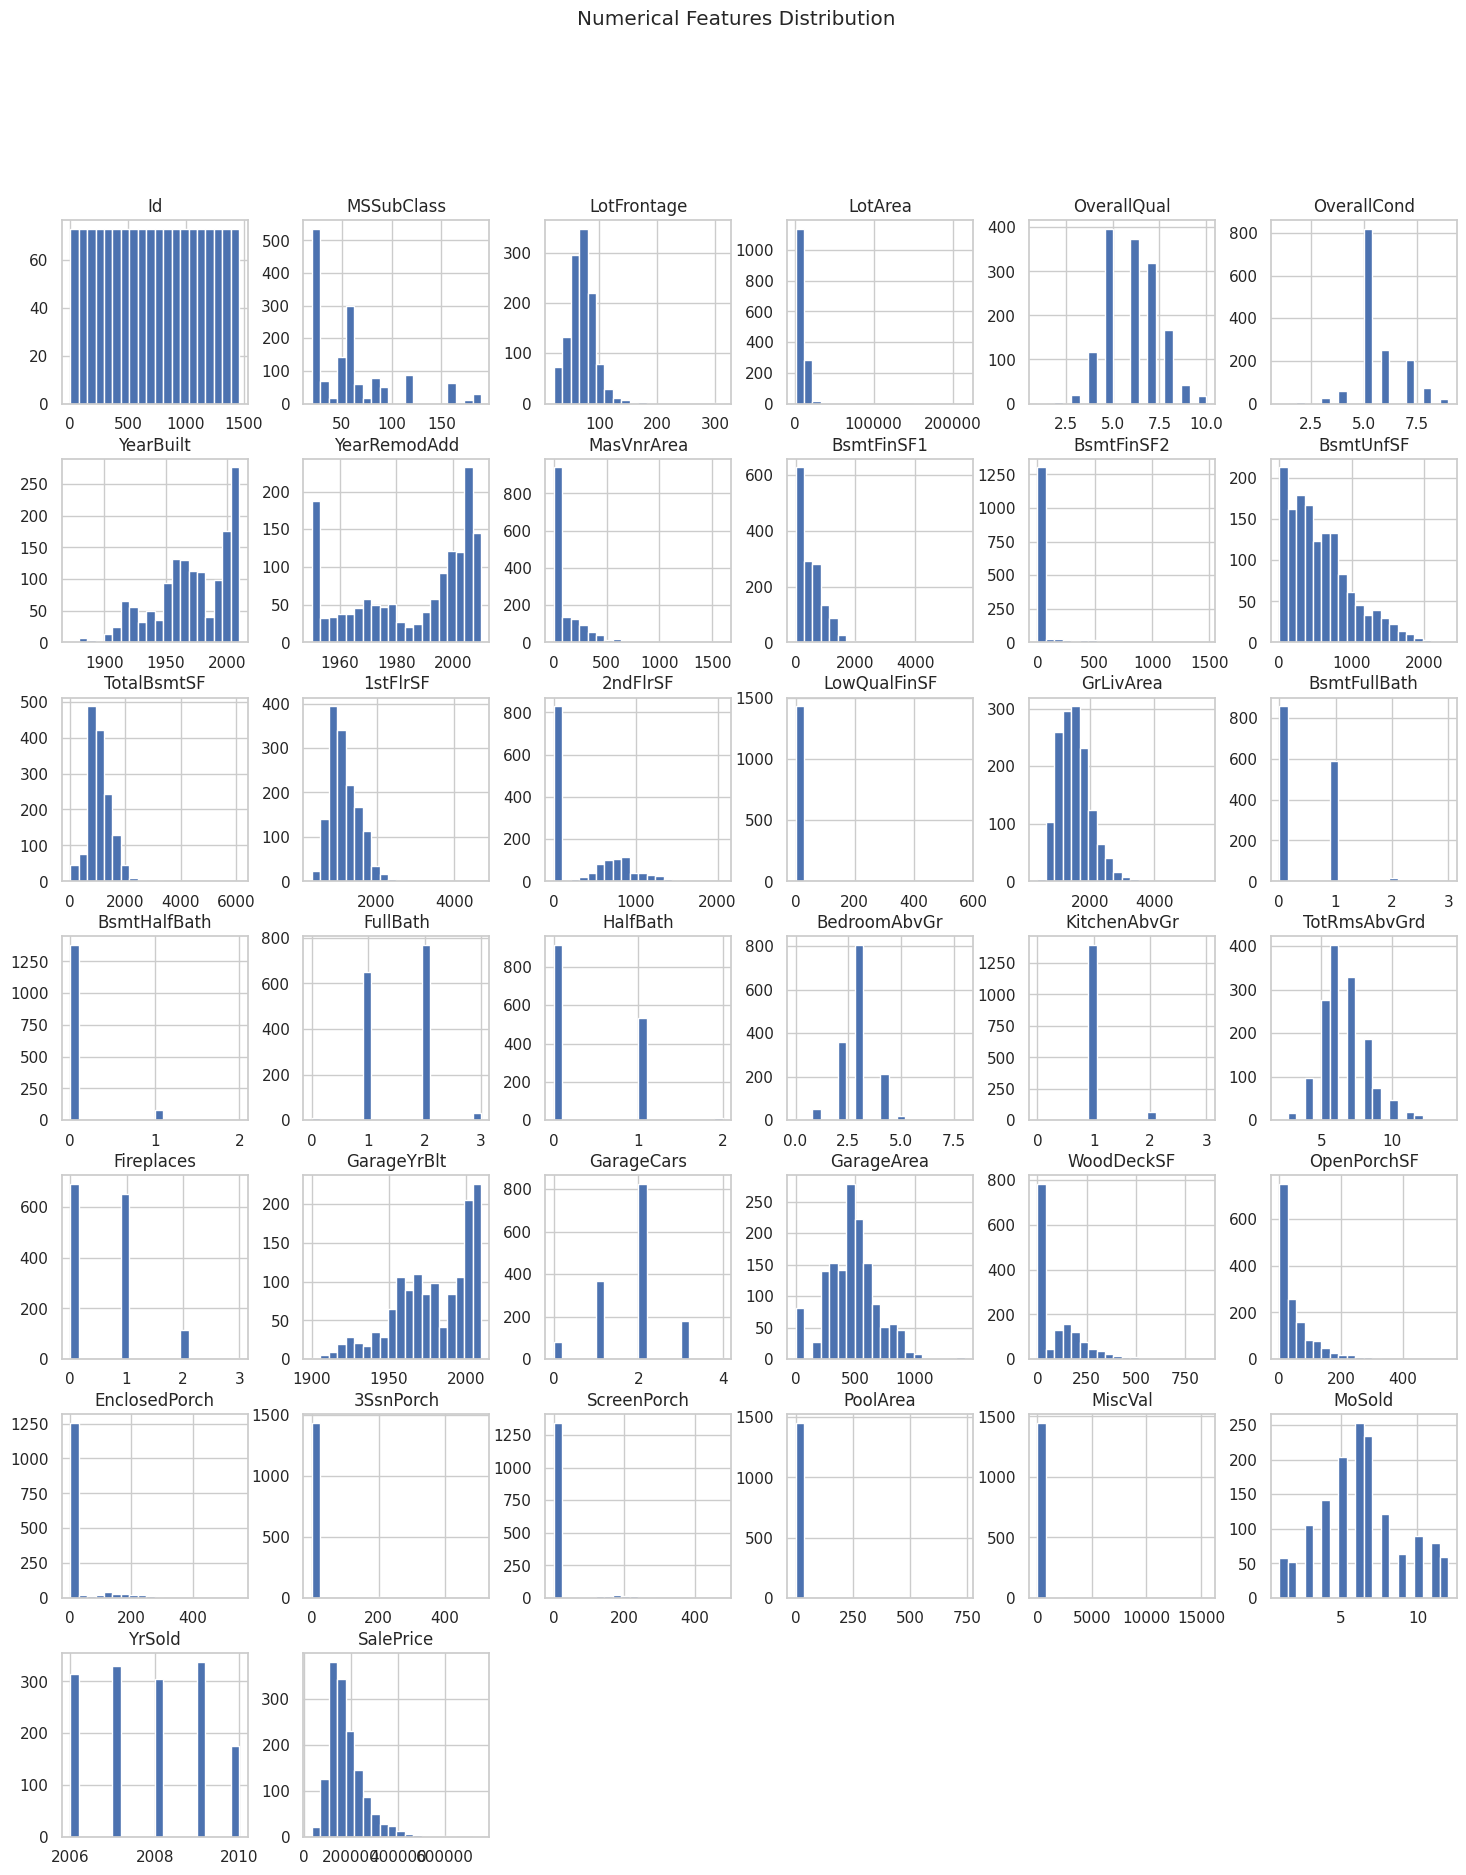

In [15]:
import math

num_features = train.select_dtypes(include=[np.number]).columns.tolist()
n_features = len(num_features)
cols = 6
rows = math.ceil(n_features / cols)

train[num_features].hist(bins=20, figsize=(18, rows * 3), layout=(rows, cols))
plt.suptitle("Numerical Features Distribution")
plt.show()


In [16]:
# Drop the columns containing null values
train = train.loc[:,train.isnull().sum() == 0]
test = test.loc[:,train.columns.drop(['SalePrice'])]
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [17]:
# Select only numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

train = train.select_dtypes(include=numerics)
test = test.select_dtypes(include=numerics)
train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [18]:
# Drop the columns containing null values
train = train.loc[:,train.isnull().sum() == 0]
test = test.loc[:,train.columns.drop(['SalePrice'])]
train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [19]:
# Split train -> train, validation
from sklearn.model_selection import train_test_split
X = train[train.columns.drop(['SalePrice'])]
y = train[['SalePrice']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42) 

In [20]:
# Scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_val_sc = sc.transform(X_val)

LINEAR REGRESSION

In [22]:
# Fit Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_sc, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_val_sc)

In [24]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:",MSE)
print("Root Mean Squared Error:",np.sqrt(MSE))

Mean Squared Error: 1611519899.4528046
Root Mean Squared Error: 40143.74047660238


Lasso Regression 

In [25]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Fit Lasso Regression Model
lasso = Lasso(alpha=0.1, max_iter=10000, random_state=42)
lasso.fit(X_train_sc, y_train)
y_pred_lasso = lasso.predict(X_val_sc)

mse_lasso = mean_squared_error(y_val, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_val, y_pred_lasso)

print("Lasso Regression:")
print("  RMSE:", rmse_lasso)
print("  R^2:", r2_lasso)


Lasso Regression:
  RMSE: 40133.21828114205
  R^2: 0.780603549042814


Ridge regression 

In [26]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0, max_iter=10000, random_state=42)
ridge.fit(X_train_sc, y_train)
y_pred_ridge = ridge.predict(X_val_sc)

rmse_ridge = np.sqrt(mean_squared_error(y_val, y_pred_ridge))
r2_ridge = r2_score(y_val, y_pred_ridge)

print("Ridge Regression:")
print("  RMSE:", rmse_ridge)
print("  R^2:", r2_ridge)


Ridge Regression:
  RMSE: 40130.12191260899
  R^2: 0.7806374016013723


Random Forest regressor 

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_sc, y_train)
y_pred_rf = rf.predict(X_val_sc)

rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
r2_rf = r2_score(y_val, y_pred_rf)

print("Random Forest Regression:")
print("  RMSE:", rmse_rf)
print("  R^2:", r2_rf)


/tmp/ipykernel_35/629830117.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_sc, y_train)


Random Forest Regression:
  RMSE: 30424.301391002657
  R^2: 0.8739151654413598


XG Boost Regressor 

In [28]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
xgb.fit(X_train_sc, y_train)
y_pred_xgb = xgb.predict(X_val_sc)

rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
r2_xgb = r2_score(y_val, y_pred_xgb)

print("XGBoost Regression:")
print("  RMSE:", rmse_xgb)
print("  R^2:", r2_xgb)


XGBoost Regression:
  RMSE: 29865.323748311373
  R^2: 0.8785056512067712


Light GBM

In [29]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
lgbm.fit(X_train_sc, y_train)
y_pred_lgbm = lgbm.predict(X_val_sc)

rmse_lgbm = np.sqrt(mean_squared_error(y_val, y_pred_lgbm))
r2_lgbm = r2_score(y_val, y_pred_lgbm)

print("LightGBM Regression:")
print("  RMSE:", rmse_lgbm)
print("  R^2:", r2_lgbm)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2749
[LightGBM] [Info] Number of data points in the train set: 978, number of used features: 31
[LightGBM] [Info] Start training from score 181046.955010
LightGBM Regression:
  RMSE: 31944.09314635307
  R^2: 0.8610038565141291


Best Models on Train.csv

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Example: Load your processed train.csv (already one-hot encoded and scaled if needed)
# train = pd.read_csv('train_processed.csv')
# X = train.drop(['SalePrice', 'Id'], axis=1)
# y = train['SalePrice']

# Split into train/validation for evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# RANDOM FOREST REGRESSOR
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
r2_rf = r2_score(y_val, y_pred_rf)
print("Random Forest:")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  R^2:  {r2_rf:.4f}")

# XGBOOST REGRESSOR
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
r2_xgb = r2_score(y_val, y_pred_xgb)
print("XGBoost:")
print(f"  RMSE: {rmse_xgb:.2f}")
print(f"  R^2:  {r2_xgb:.4f}")


/tmp/ipykernel_35/1627225633.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Random Forest:
  RMSE: 28937.05
  R^2:  0.8908
XGBoost:
  RMSE: 28547.93
  R^2:  0.8937
